In [62]:
import numpy as np
import matplotlib.pyplot as plt

### KL-divergence in the case of discrete probability function

### $D_{KL}(p||q)=\sum_x p(x)\log{p(x) \over q(x)}$


In [63]:
def get_kldiv_discrete(p, q, eps=1e-7):
    return np.sum(p * (np.log(np.clip(p, a_min=eps, a_max=None)) - np.log(np.clip(q, a_min=eps, a_max=None))))
  
def plot_discrete(p1, p2):
    plt.figure(figsize=[10, 2])
    plt.subplot(1, 2, 1)
    plt.title('p1')
    plt.bar(np.arange(len(p1)), p1)
    plt.ylim([0, 1])

    plt.subplot(1, 2, 2)
    plt.title('p2')
    plt.bar(np.arange(len(p2)), p2)
    plt.ylim([0, 1])

    plt.tight_layout()
    plt.show()

    print('KL divergence between p1 and p2 : {}'.format(get_kldiv_discrete(p1, p2)))

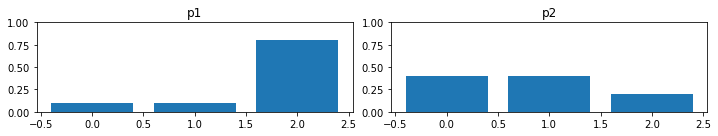

KL divergence between p1 and p2 : 0.8317766166719343


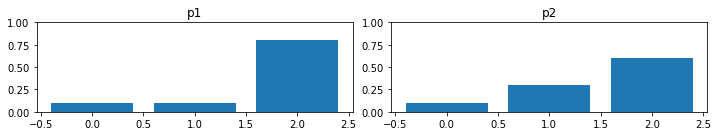

KL divergence between p1 and p2 : 0.1202844290946139


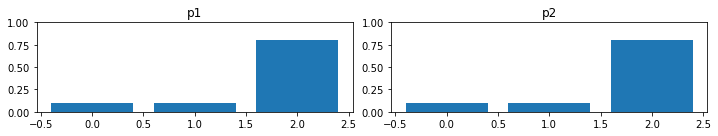

KL divergence between p1 and p2 : 0.0


In [64]:
p1 = np.array([0.1, 0.1, 0.8])
p2 = np.array([0.4, 0.4, 0.2])

plot_discrete(p1, p2)

p1 = np.array([0.1, 0.1, 0.8])
p2 = np.array([0.1, 0.3, 0.6])

plot_discrete(p1, p2)

p1 = np.array([0.1, 0.1, 0.8])
p2 = np.array([0.1, 0.1, 0.8])

plot_discrete(p1, p2)

### KL-divergence in the case of continuous probability function

### $D_{KL}(p||q)=\int p(x)\log{p(x) \over q(x)}dx$


In [149]:
# KL-Divergence between two Gaussian distribution
# Reference : https://stats.stackexchange.com/questions/60680/kl-divergence-between-two-multivariate-gaussians
def get_kldiv_discrete(p1_mean, p1_cov, p2_mean, p2_cov):
    from numpy.linalg import det, inv
    return 0.5 * (np.log(det(p2_cov)/det(p1_cov)) - 
                  2 + np.trace(inv(p2_cov) @ p1_cov) + 
                  (p2_mean-p1_mean).T @ inv(p2_cov) @ (p2_mean-p1_mean))

def plot_continuous(p1_mean, p1_cov, p2_mean, p2_cov):
    from scipy.stats import multivariate_normal
    
    # Get coordinates from (-3, -3) to (3, 3)
    xx = np.linspace(-3, 3, 100)
    yy = np.linspace(-3, 3, 100)
    # (10000, 2)
    coords = np.array([[x_, y_] for y_ in xx for x_ in xx])

    likelihood1 = multivariate_normal.pdf(coords, mean=p1_mean, cov=p1_cov)
    likelihood2 = multivariate_normal.pdf(coords, mean=p2_mean, cov=p2_cov)
    likelihood = likelihood1 + likelihood2

    plt.figure(figsize=[7, 6])
    plt.scatter(coords[:, 0], coords[:, 1], cmap='jet', c=likelihood)
    plt.tight_layout()
    plt.colorbar()
    plt.show()

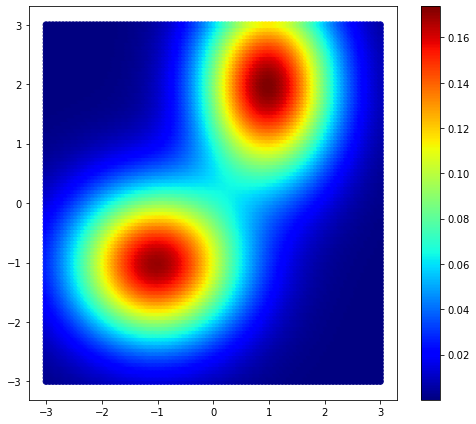

KL divergence between p1 and p2 : 6.70293046837303


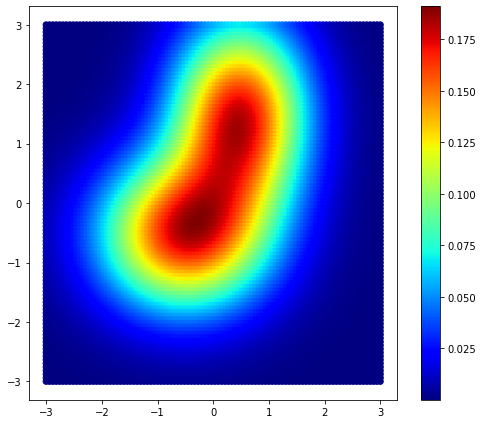

KL divergence between p1 and p2 : 2.4767399921825533


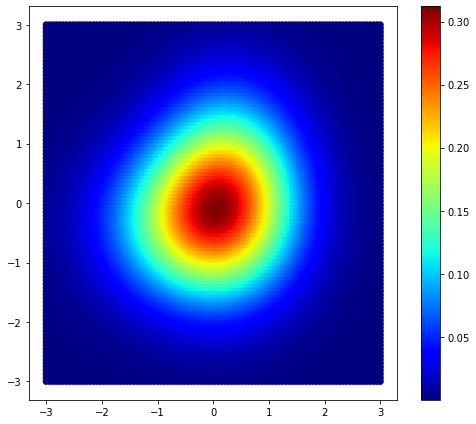

KL divergence between p1 and p2 : 0.5029304683730297


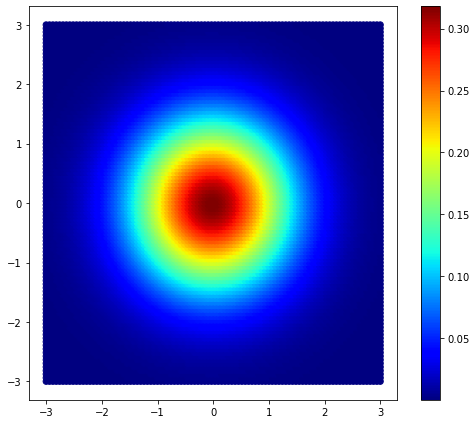

KL divergence between p1 and p2 : 0.0


In [150]:
p1_mean = np.array([-1, -1])
p1_cov = np.array([[1.1, 0],
                   [0, 0.8]])

p2_mean = np.array([1, 2])
p2_cov = np.array([[0.7, 0],
                   [0, 1.2]])

plot_continuous(p1_mean, p1_cov, p2_mean, p2_cov)
print('KL divergence between p1 and p2 :', get_kldiv_discrete(p1_mean, p1_cov, p2_mean, p2_cov))

p1_mean = np.array([-0.5, -0.5])
p1_cov = np.array([[1.1, 0],
                   [0, 0.8]])

p2_mean = np.array([0.5, 1.5])
p2_cov = np.array([[0.7, 0],
                   [0, 1.2]])

plot_continuous(p1_mean, p1_cov, p2_mean, p2_cov)
print('KL divergence between p1 and p2 :', get_kldiv_discrete(p1_mean, p1_cov, p2_mean, p2_cov))

p1_mean = np.array([-0.3, -0.3])
p1_cov = np.array([[1.1, 0],
                   [0, 0.8]])

p2_mean = np.array([0.3, 0.3])
p2_cov = np.array([[0.7, 0],
                   [0, 1.2]])

plot_continuous(p1_mean, p1_cov, p2_mean, p2_cov)
print('KL divergence between p1 and p2 :', get_kldiv_discrete(p1_mean, p1_cov, p2_mean, p2_cov))

p1_mean = np.array([0.0, 0.0])
p1_cov = np.array([[1, 0],
                   [0, 1]])

p2_mean = np.array([0.0, 0.0])
p2_cov = np.array([[1, 0],
                   [0, 1]])

plot_continuous(p1_mean, p1_cov, p2_mean, p2_cov)
print('KL divergence between p1 and p2 :', get_kldiv_discrete(p1_mean, p1_cov, p2_mean, p2_cov))